Importing dependencies

In [64]:
# Utililty
import numpy as np
import pandas as pd

# Plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

# Language Processing
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
from sklearn.feature_extraction.text import TfidfVectorizer

# Classification Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [65]:
df = pd.read_csv("rotten_tomatoes_reviews.csv")
df.drop_duplicates('Review', inplace=True, ignore_index=False)

In [66]:
# Downloading NLTK dependencies

import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suhan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\suhan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\suhan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Pre-processing the data.

In [67]:
stopwords_list = stopwords.words('english')
additional_stopwords = {"film","movie","director","actor", "actress", "one", "story","character","even","make"} # Some movie/show review-specific stopwords that do not necessarily add any context in predicting the outcome of the review
stopwords_list.extend(additional_stopwords)
lemmatizer = WordNetLemmatizer()

def remove_punctuation(review):
    for mark in punctuation:
        review = review.replace(mark,' ')

    return review

def convert_lowercase(review):
    return review.lower()

def tokenization(review):
    return word_tokenize(review)

def remove_stopwords(tok_review):
    res = []
    for word in tok_review:
        if word not in stopwords_list:
            res.append(word)

    return res

def lemmatization(tok_review):
    res = []
    for word in tok_review:
        res.append(lemmatizer.lemmatize(word))

    return res

def review_size(review):
    words = review.split()
    word_count = len(words)
    return word_count

def processing(review):
    review = remove_punctuation(review)
    review = convert_lowercase(review)
    tok_review = tokenization(review)
    tok_review = remove_stopwords(tok_review)
    tok_review = lemmatization(tok_review)
    cleaned_review = ' '.join(tok_review)

    return cleaned_review

In [68]:
df['cleaned_reviews'] = df['Review'].map(processing)
df['Review_Size'] = df['Review'].map(review_size)
df.drop_duplicates('cleaned_reviews', inplace=True, ignore_index=False)

Data Visualization

C:\Users\suhan\AppData\Local\Temp\ipykernel_2956\1503069837.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, y = "Freshness", palette="viridis")


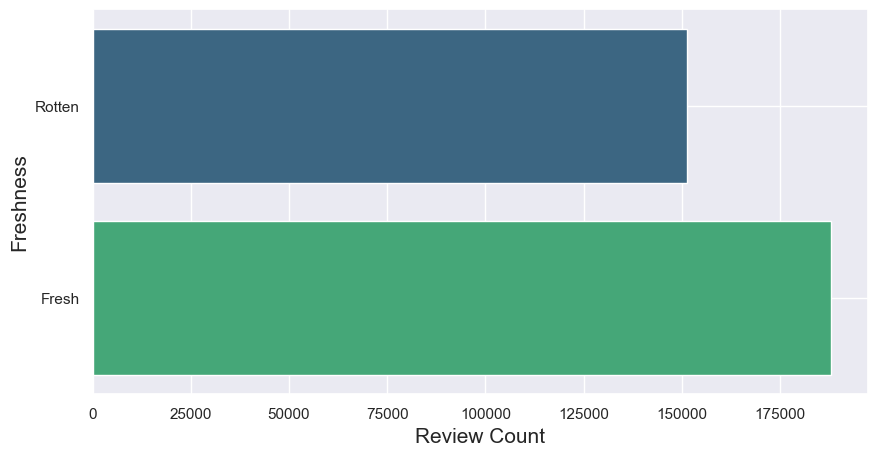

In [69]:
#Let us check to see if the classes are balanced.

sns.set_theme()
plt.figure(figsize=(10,5))
ax = sns.countplot(data = df, y = "Freshness", palette="viridis")
plt.yticks(ticks = [0,1], labels = {"Fresh", "Rotten"})
plt.xlabel('Review Count', size = 15)
plt.ylabel('Freshness', size = 15)
plt.grid(color = 'w')

C:\Users\suhan\AppData\Local\Temp\ipykernel_2956\397601362.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y = 'Freshness', x = 'Review_Size', orient='h', showfliers=False, palette="viridis", notch=True, medianprops={"color":"coral"})


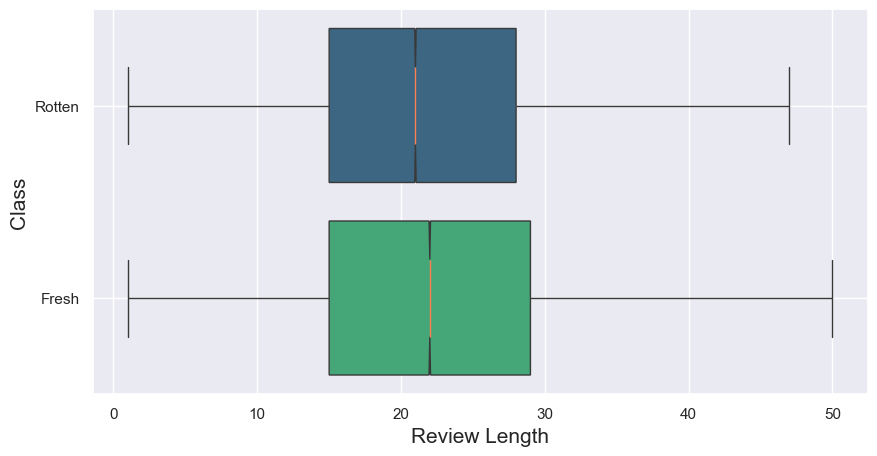

In [70]:
# Checking whether the review length varies across the classes.

plt.figure(figsize=(10,5))
sns.boxplot(data=df, y = 'Freshness', x = 'Review_Size', orient='h', showfliers=False, palette="viridis", notch=True, medianprops={"color":"coral"})
plt.yticks(ticks = [0,1], labels={"Fresh","Rotten"})
plt.ylabel("Class",size=15)
plt.xlabel("Review Length", size=15)
plt.grid(color='w')

C:\Users\suhan\AppData\Local\Temp\ipykernel_2956\2122374913.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, y = "Freshness", x = "Review_Size", orient='h', palette='mako')


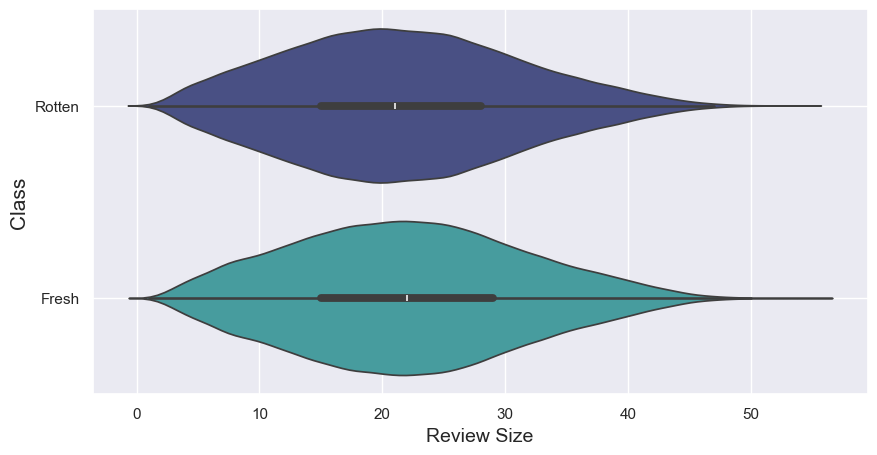

In [71]:
# Checking the density distribution of the review size.

plt.figure(figsize=(10,5))
sns.violinplot(data=df, y = "Freshness", x = "Review_Size", orient='h', palette='mako')
plt.yticks(ticks=[0,1], labels={"Fresh","Rotten"})
plt.xlabel('Review Size', size=14)
plt.ylabel('Class', size=15)
plt.grid(color='w')

Data Clouds

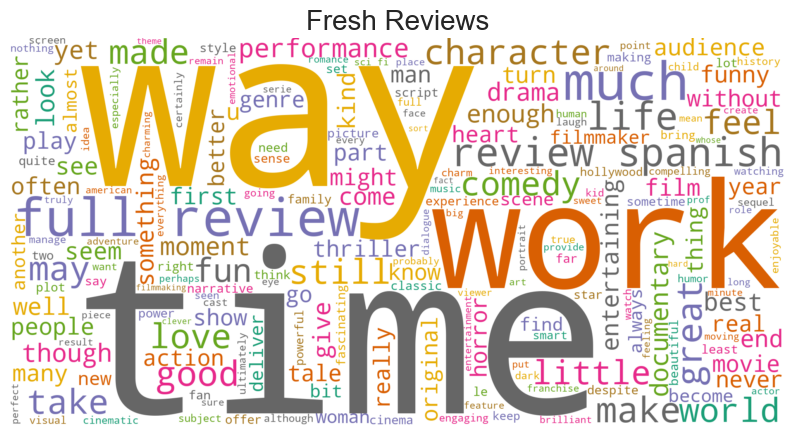

In [72]:
# Generating a word cloud for fresh reviews.

plt.figure(figsize=(10, 10))
subset1 = df[df['Freshness']==1]
text_fresh = subset1['cleaned_reviews'].values
wc1 = WordCloud(background_color='white', colormap='Dark2', width=2000, height=1000).generate(' '.join(text_fresh))
plt.axis('off')
plt.title("Fresh Reviews", fontsize=20)
plt.imshow(wc1, interpolation='bilinear')

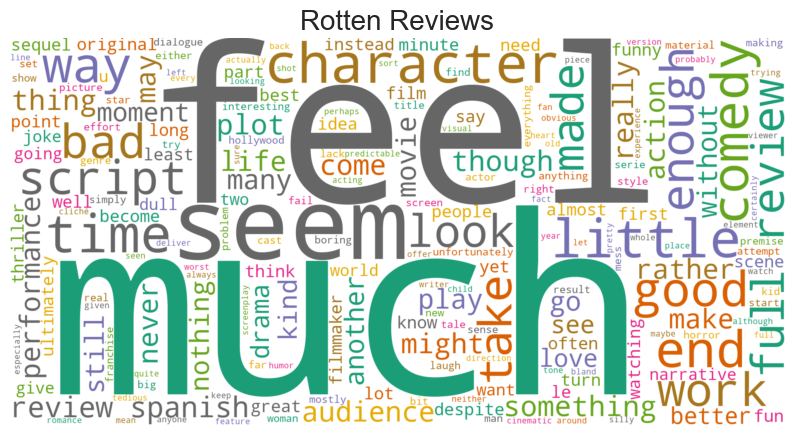

In [73]:
# Generating a word cloud for rotten reviews.

plt.figure(figsize=(10, 10))
subset1 = df[df['Freshness']==0]
text_fresh = subset1['cleaned_reviews'].values
wc1 = WordCloud(background_color='white', colormap='Dark2', width=2000, height=1000).generate(' '.join(text_fresh))
plt.axis('off')
plt.title("Rotten Reviews", fontsize=20)
plt.imshow(wc1, interpolation='bilinear')

C:\Users\suhan\AppData\Local\Temp\ipykernel_2956\1989228728.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=common_word, y=freq, palette='viridis')


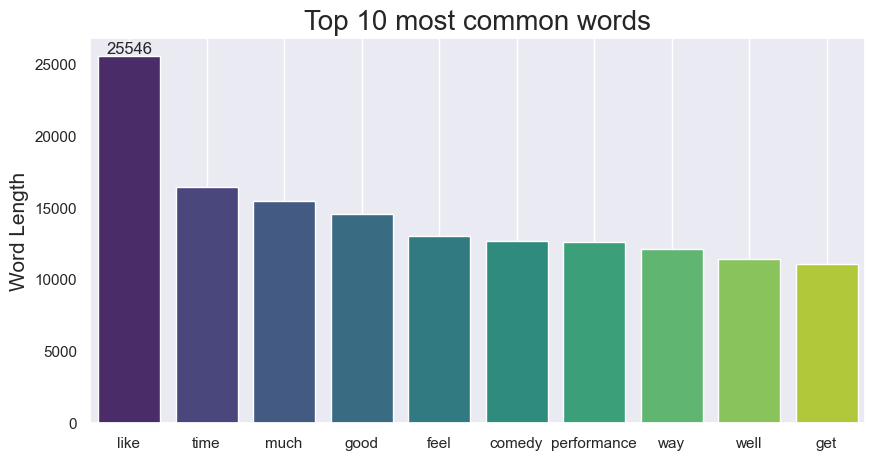

In [74]:
# Generating a graphic for the most common words used

from collections import Counter   # To count the frequency of each word

temp=[]
for review in df['cleaned_reviews']:
  for word in review.split():
    temp.append(word)
vocab = Counter(temp)

common_word = []
freq = []

for i, j in vocab.most_common()[:10]:
  common_word.append(i)
  freq.append(j)


plt.figure(figsize=(10,5))
ax = sns.barplot(x=common_word, y=freq, palette='viridis')
plt.title('Top 10 most common words', size=20)
ax.bar_label(ax.containers[0])
plt.ylabel("Word Length", size=15)
plt.grid()

Classification Model

In [76]:
# Vectorizing the tokenized reviews 

X = df['cleaned_reviews']
Y = df['Freshness']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=76)

tfidf = TfidfVectorizer(ngram_range=(1,2))
tfidf.fit(X_train)    # Fit on train

X_train_tf = tfidf.transform(X_train)
X_test_tf = tfidf.transform(X_test)

In [83]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='saga', penalty='l2', random_state=394)
lr.fit(X_train_tf, y_train)

# Model evaluation

y_pred_train = lr.predict(X_train_tf)
y_pred_test = lr.predict(X_test_tf)

print('\tClassification Report for Logistic Regression on Train\n\n', classification_report(y_train, y_pred_train, target_names={"Fresh","Rotten"}))
print('\n\tClassification Report for Logistic regression on Test\n\n', classification_report(y_test, y_pred_test, target_names={"Fresh","Rotten"}))

	Classification Report for Logistic Regression on Train

               precision    recall  f1-score   support

      Rotten       0.89      0.85      0.87    121130
       Fresh       0.88      0.92      0.90    150352

    accuracy                           0.89    271482
   macro avg       0.89      0.89      0.89    271482
weighted avg       0.89      0.89      0.89    271482


	Classification Report for Logistic regression on Test

               precision    recall  f1-score   support

      Rotten       0.80      0.73      0.76     30283
       Fresh       0.80      0.85      0.82     37588

    accuracy                           0.80     67871
   macro avg       0.80      0.79      0.79     67871
weighted avg       0.80      0.80      0.80     67871

